# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
#High level inferences from the analysis:
  #Latitude and Temperatue:
    #In the Northern Hemisphere: There is a negative correlation between latitude and temperature with higher temp 
      #closer to the equator which decreases as you move up away from the equator
    #In the Southern Hemisphere: There is positive correlation between the 2 variables with temp increasing 
        #as you move closer to the equator
  #Latitude and the other variables including humidity, cloudiness and wind speed:
     #There is little or no correlation between all the other variables and latitude in both hemispheres 
     #Latitude effect on the other variables is statistically insignificant with all having a R-Square of less than 1%


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# countries = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# len(countries)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Define base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# define query url 
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [7]:
#create emplty lits corressponding to required columns in df to hold response outputs
#create new list for cities to hold only cities in original list with weather data to ensure length of arrays 
#for df are the same 
lat =[]
lon = []
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]
city_list =[]

#define counters to handle API calls in order not to exceed max allowed 
record_retrieved = 0
batch = 1

# create for loop to perform weather check with API calls to city in cities list 
# break API calls into subsets of 50 with if statement
# set time to sleep to 60s to ensure API calls do not exceed maximum allowed by openweather API per call
# create try and except error handling for city in cities with no data 
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        max_temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_list.append(response['name'])
        if record_retrieved > 48:
            record_retrieved = 0
            batch += 1
            time.sleep(60)
        else:
            record_retrieved += 1
        print(f"Processing Record {record_retrieved} of Set {batch} | {response['name']}")
    except Exception:
        print("City not found. Skipping...")
print("Data Retrieval Complete")

Processing Record 1 of Set 1 | Airai
Processing Record 2 of Set 1 | Tasiilaq
Processing Record 3 of Set 1 | Bredasdorp
Processing Record 4 of Set 1 | Westport
City not found. Skipping...
Processing Record 5 of Set 1 | Mossamedes
Processing Record 6 of Set 1 | Chui
Processing Record 7 of Set 1 | Porto
Processing Record 8 of Set 1 | Talnakh
Processing Record 9 of Set 1 | Cururupu
Processing Record 10 of Set 1 | Domoni
Processing Record 11 of Set 1 | Lebu
Processing Record 12 of Set 1 | Port
Processing Record 13 of Set 1 | Nikolskoye
City not found. Skipping...
Processing Record 14 of Set 1 | Carnarvon
Processing Record 15 of Set 1 | Skerries
Processing Record 16 of Set 1 | St. George's
Processing Record 17 of Set 1 | Lompoc
Processing Record 18 of Set 1 | Mugur-Aksy
Processing Record 19 of Set 1 | Kapaa
City not found. Skipping...
Processing Record 20 of Set 1 | Bonavista
Processing Record 21 of Set 1 | Hithadhoo
Processing Record 22 of Set 1 | Salalah
Processing Record 23 of Set 1 | El 

Processing Record 40 of Set 4 | Vila
Processing Record 41 of Set 4 | Kaitangata
Processing Record 42 of Set 4 | El Puerto de Santa María
City not found. Skipping...
Processing Record 43 of Set 4 | Eyl
Processing Record 44 of Set 4 | Pevek
Processing Record 45 of Set 4 | Ginir
Processing Record 46 of Set 4 | Alta
Processing Record 47 of Set 4 | Fallon
Processing Record 48 of Set 4 | Upington
Processing Record 49 of Set 4 | Waitati
Processing Record 0 of Set 5 | Cascais
Processing Record 1 of Set 5 | Alcañiz
Processing Record 2 of Set 5 | Mahébourg
Processing Record 3 of Set 5 | Tarko-Sale
Processing Record 4 of Set 5 | Marzuq
Processing Record 5 of Set 5 | Mount
Processing Record 6 of Set 5 | Saldanha
Processing Record 7 of Set 5 | Tigil'
Processing Record 8 of Set 5 | Nadvoitsy
Processing Record 9 of Set 5 | Abhā
Processing Record 10 of Set 5 | Rio
Processing Record 11 of Set 5 | Isangel
Processing Record 12 of Set 5 | Andenes
Processing Record 13 of Set 5 | Christiana
Processing Recor

Processing Record 31 of Set 8 | Beringovskiy
Processing Record 32 of Set 8 | Imbituba
Processing Record 33 of Set 8 | Mayumba
Processing Record 34 of Set 8 | Aklavik
Processing Record 35 of Set 8 | Kothi
Processing Record 36 of Set 8 | Codajás
Processing Record 37 of Set 8 | Nagato
Processing Record 38 of Set 8 | Vera
Processing Record 39 of Set 8 | Matveyevka
Processing Record 40 of Set 8 | Kenai
Processing Record 41 of Set 8 | Kalmunai
Processing Record 42 of Set 8 | Koygorodok
Processing Record 43 of Set 8 | Palmares
Processing Record 44 of Set 8 | Kamenka
Processing Record 45 of Set 8 | Srednekolymsk
Processing Record 46 of Set 8 | Aksarka
Processing Record 47 of Set 8 | Lovozero
Processing Record 48 of Set 8 | Charter Township of Clinton
Processing Record 49 of Set 8 | Havre-St-Pierre
Processing Record 0 of Set 9 | Cleethorpes
Processing Record 1 of Set 9 | Hanmer
Processing Record 2 of Set 9 | Carndonagh
Processing Record 3 of Set 9 | Beyneu
City not found. Skipping...
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#inspect lenght of outputs and compare with original cities list 
print(len(max_temp))
print(len(city_list))
print(len(cities))

546
546
605


In [9]:
#convert raw data into df
weatherpy_df = pd.DataFrame({"City":city_list,"Lat": lat,"Lng": lon,"Max Temp":max_temp,"Humidity":humidity,
                             "Cloudiness":cloudiness,"Wind Speed":wind_speed,"Country":country,"Date":date})
weatherpy_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Airai,-8.93,125.41,57.36,100,98,4.43,TL,1592332284
1,Tasiilaq,65.61,-37.64,35.60,92,75,18.34,GL,1592332284
2,Bredasdorp,-34.53,20.04,53.60,93,0,3.51,ZA,1592332284
3,Westport,41.14,-73.36,73.00,49,1,12.75,US,1592332284
4,Mossamedes,-15.20,12.15,72.48,62,0,3.56,AO,1592332285


In [11]:
#export data into csv
weatherpy_df.to_csv('output_data/wetherpy.csv', encoding="utf-8", index=False)

In [12]:
weatherpy_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [13]:
#check for rows with missing values or NaN
weatherpy_df.isnull().sum()

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#check for cities with high humidity >100%
Highhumidity = len(weatherpy_df.loc[weatherpy_df["Humidity"] >100])
Highhumidity

0

In [15]:
#  Get the indices of cities that have humidity over 100%.


In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [17]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

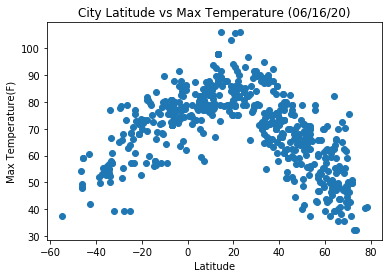

In [18]:
#Define x and y variables for scatter plot
x_values = weatherpy_df["Lat"]
y_values = weatherpy_df["Max Temp"]
plt.scatter(x_values,y_values)
# Plot title and labels 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title("City Latitude vs Max Temperature (06/16/20)")
#Save and show plot
plt.savefig("Images/Lat_Vs_Temp.png")
plt.show

In [19]:
#The relationship between latitude and Temperature is strong, linear, and positive in the southern hemisphere but
#negative in the northen hemisphere. This is a symetric scatter plot with positive slope in the first half and 
#negative slope in the second half. The slope of the entire plot is zero. 

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

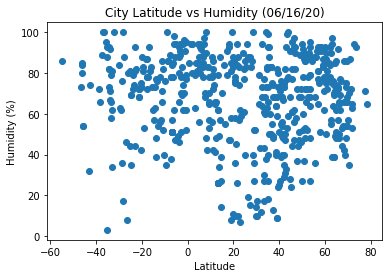

In [20]:
#Define x and y variables for scatter plot
x_values = weatherpy_df["Lat"]
y_values = weatherpy_df["Humidity"]
plt.scatter(x_values,y_values)
# Plot title and labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (06/16/20)")
#Save and show plot
plt.savefig("Images/Lat_Vs_Hum.png")
plt.show

In [21]:
#The relationship between latitude and humidity is non-linear,weak with zero slope 

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

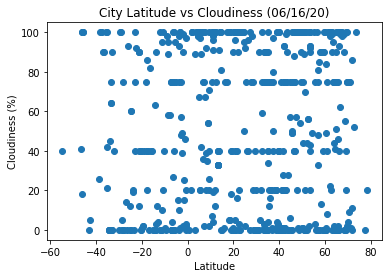

In [22]:
#Define x and y variables for scatter plot
x_values = weatherpy_df["Lat"]
y_values = weatherpy_df["Cloudiness"]
plt.scatter(x_values,y_values)
# Plot title and labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (06/16/20)")
#Save and show plot
plt.savefig("Images/Lat_Vs_Cloudiness.png")
plt.show

In [23]:
##The relationship between latitude and cloudiness is non-linear,weak with zero slope 

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

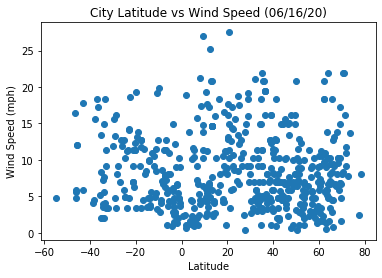

In [24]:
#Define x and y variables for scatter plot
x_values = weatherpy_df["Lat"]
y_values = weatherpy_df["Wind Speed"]
plt.scatter(x_values,y_values)
# plot title and labels 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (06/16/20)")
#Save and show plot
plt.savefig("Images/Lat_Vs_Windspeed.png")
plt.show

In [25]:
##The relationship between latitude and wind speed is non-linear,weak with zero slope 

## Linear Regression

In [26]:
# OPTIONAL: Create a function to create Linear Regression plots
def f_regression(x_values,y_values,i,j):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    a= plt.scatter(x_values,y_values)
    b= plt.plot(x_values,regress_values,"r-")
    c= print(f"The r-squared is: {rvalue**2}")
    d= plt.annotate(line_eq, (i,j),fontsize=15,color="red")
    return (a,b,c,d)

In [27]:
#filter and craete northern hemisphere df
NorthHemi_df = weatherpy_df.loc[weatherpy_df["Lat"] >= 0]
#NorthernHemi_df

In [28]:
#filter and craete southern hemisphere df
SouthHemi_df = weatherpy_df.loc[weatherpy_df["Lat"] < 0]
#SouthHemi_df

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5696749294130483


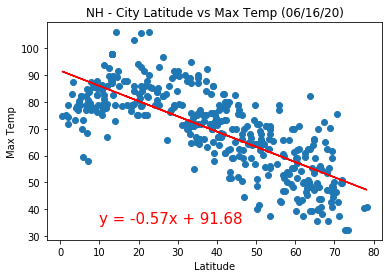

In [29]:
#NH Cities- Maximum Temp Vs Latitude 
f_regression(NorthHemi_df["Lat"], NorthHemi_df["Max Temp"],10,35)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("NH - City Latitude vs Max Temp (06/16/20)")
plt.savefig("Images/NH_Lat_Vs_MaxTemp.png")

In [30]:
#Inferences from Northern Hemisphere(NH) Max Temp vs Latitude regression:
#Negtive correlation between the 2 variables 
#Approximately 55% of the changes in Temperature in the NH is attributed to latitude with R-Square value of 0.57

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.536340785528179


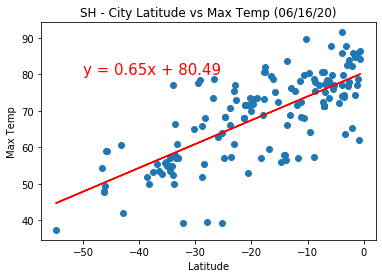

In [34]:
#SH Cities- Maximum Temp Vs Latitude
f_regression(SouthHemi_df["Lat"], SouthHemi_df["Max Temp"],-50,80)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("SH - City Latitude vs Max Temp (06/16/20)")
plt.savefig("Images/SH_Lat_Vs_MaxTemp.png")

In [35]:
#Inferences from Southern Hemisphere(SH) Max Temp vs Latitude regression:
#Positive correlation between the 2 variables with temp increasing as you move closer to the equator 
#Approximately 54% of the changes in Temperature in the SH is attributed to latitude with R-Square value of 0.54

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008598118779437856


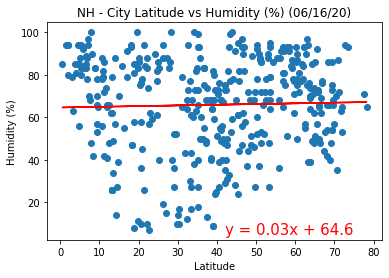

In [36]:
#NH Cities- Humidity Vs Latitude 
f_regression(NorthHemi_df["Lat"], NorthHemi_df["Humidity"],42,5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("NH - City Latitude vs Humidity (%) (06/16/20)")
plt.savefig("Images/NH_Lat_Vs_Humidity.png")

In [37]:
#Inferences from Northern Hemisphere(NH) Humidity vs Latitude regression:
#Little or no correlation between the 2 variables
#The effect of latitude on humidity is statistically insigficant as shown by R-Square value of less than 1%

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0002101684073644244


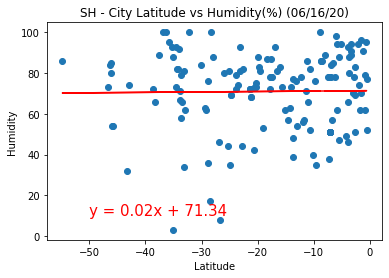

In [38]:
#SH Cities- Humidity Vs Latitude 
f_regression(SouthHemi_df["Lat"], SouthHemi_df["Humidity"],-50,10)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("SH - City Latitude vs Humidity(%) (06/16/20)")
plt.savefig("Images/SH_Lat_Vs_Humidity.png")

In [39]:
#Inferences from Southern Hemisphere(SH) Humidity vs Latitude regression:
#Little or no correlation between the 2 variables
#The effect of latitude on humidity is statistically insigficant as shown by R-Square value of less than 1%

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0016330459894740483


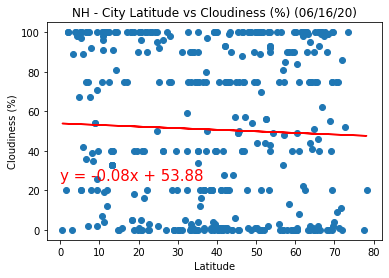

In [40]:
#NH Cities- Cloudiness Vs Latitude 
f_regression(NorthHemi_df["Lat"], NorthHemi_df["Cloudiness"],0,25)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("NH - City Latitude vs Cloudiness (%) (06/16/20)")
plt.savefig("Images/NH_Lat_Vs_Cloudiness.png")

In [41]:
#Inferences from Northern Hemisphere(NH) Cloudiness vs Latitude regression:
#Little or no correlation between the 2 variables
#The effect of latitude on Cloudiness is statistically insigficant as shown by R-Square value of less than 1%

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004096806406158668


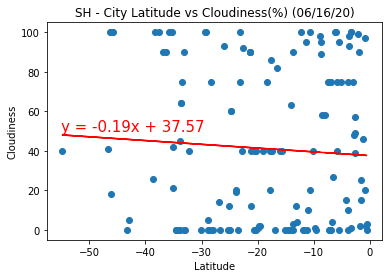

In [42]:
#SH Cities- Cloudiness Vs Latitude 
f_regression(SouthHemi_df["Lat"], SouthHemi_df["Cloudiness"],-55,50)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("SH - City Latitude vs Cloudiness(%) (06/16/20)")
plt.savefig("Images/SH_Lat_Vs_Cloudiness.png")

In [43]:
#Inferences from Southern Hemisphere(SH) Cloudiness vs Latitude regression:
#Little or no correlation between the 2 variables
#The effect of latitude on Cloudiness is statistically insigficant as shown by R-Square value of less than 1%

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006032452089373127


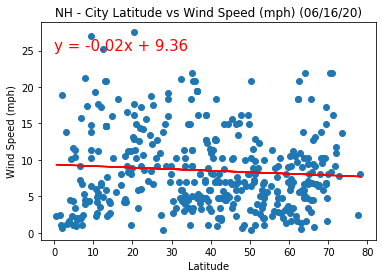

In [45]:
#NH Cities- Wind Speed Vs Latitude
f_regression(NorthHemi_df["Lat"], NorthHemi_df["Wind Speed"],0,25)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("NH - City Latitude vs Wind Speed (mph) (06/16/20)")
plt.savefig("Images/NH_Lat_Vs_WindSpeed.png")

In [46]:
#Inferences from Northern Hemisphere(NH) Wind Speed vs Latitude regression:
#Little or no correlation between the 2 variables
#The effect of latitude on Wind Speed is statistically insigficant as shown by R-Square value of less than 1%

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.046727695116181245


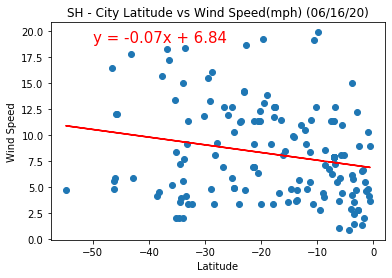

In [49]:
#SH Cities- Wind Speed Vs Latitude 
f_regression(SouthHemi_df["Lat"], SouthHemi_df["Wind Speed"],-50,19)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("SH - City Latitude vs Wind Speed(mph) (06/16/20)")
plt.savefig("Images/SH_Lat_Vs_WindSpeed.png")

In [ ]:
#Inferences from Southern Hemisphere(SH) Wind Speed vs Latitude regression:
#Little or no correlation between the 2 variables
#The effect of latitude on Wind Speed is statistically insigficant as shown by R-Square value of less than 1%